# Unsupervised Learning: Clustering Lab





In [131]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import random
from sklearn import preprocessing
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. (50%) Implement the k-means clustering algorithm and the HAC (Hierarchical Agglomerative Clustering) algorithm.

### 1.1.1 HAC

### Code requirements 
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from n to 1.  To simplify the amount of output you may want to implement a mechanism to specify for which k values actual output will be generated.


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---

In [132]:
class HACClustering(BaseEstimator,ClassifierMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        self.clusters = []
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        cluster_arr = [np.array([item]) for item in X]
        self.clusters = cluster_arr
        is_done = False
        while not is_done:
          if len(self.clusters) == self.k:
            is_done = True
            break
          self.clusters = self.update_clusters(self.clusters)
        return self

    def score(self):
      self.sse = []
      self.total_sse = 0
      self.centroids = []
      # find centroids
      for i in range(len(self.clusters)):
        centroid = np.mean(self.clusters[i], axis=0)
        self.centroids.append(centroid)
        # find cluster sse
        tmp = np.linalg.norm(self.clusters[i] - centroid)
        squared_err = tmp**2
        self.sse.append(np.sum(squared_err))
        self.total_sse += squared_err

    def update_clusters(self, clusters):
      distances = []
      cluster_indexes = []
      for i in range(len(clusters)):
        tmp_dist = []
        for j in range(len(clusters)):
          min_dist = self.get_min()
          # don't want to compare point to itself
          if i == j:
            tmp_dist.append(np.inf)
            continue
          if len(clusters[i]) > 1:
            # check if j is also a cluster
            if len(clusters[j]) > 1:
            # calc distance between the two clusters
              for k in range(len(clusters[i])):
                for l in range(len(clusters[j])):
                  dist = np.linalg.norm(clusters[i][k] - clusters[j][l])
                  if self.get_should_update(dist, min_dist):
                    min_dist = dist
            else: 
              # calc distance between cluster with multiple points to single point
              for k in range(len(clusters[i])):
                dist = np.linalg.norm(clusters[i][k] - clusters[j])
                if self.get_should_update(dist, min_dist):
                    min_dist = dist
          else: 
            if len(clusters[j]) > 1:
            # i is single cluster, j has more than one
              for k in range(len(clusters[j])):
                dist = np.linalg.norm(clusters[i] - clusters[j][k])
                if self.get_should_update(dist, min_dist):
                    min_dist = dist
            else:
              # distance between two individual clusters
              min_dist = np.linalg.norm(clusters[i] - clusters[j])
          tmp_dist.append(min_dist)
        # find minimum distance value
        min_val = min(tmp_dist)
        # find index of array of min distance
        index = tmp_dist.index(min_val)
        distances.append(min_val)
        cluster_indexes.append(index)
      
      # find best overall distance
      best_dist = min(distances)
      dist_index = distances.index(best_dist)
      prev_index = cluster_indexes[dist_index]
      
      # add point at shortest distance to cluster
      comb_arr = clusters[prev_index]
      comb_arr = np.append(clusters[dist_index], np.array(clusters[prev_index]), axis=0)
      clusters[dist_index] = comb_arr
      # delete cluster because it's been merged 
      new_clusters = np.delete(clusters, prev_index)
      return new_clusters
    
    def get_min(self):
      # depending on link type, want to get initial minimum value 
      if self.link_type == 'single':
          return np.inf
      if self.link_type == 'complete':
          return 0

    def get_should_update(self, new_dist, old_dist):
      # if single link link update if new dist is **less** than old
      if self.link_type == 'single' and new_dist < old_dist:
        return True
      # if complete link update if new dist is **greater** than old
      if self.link_type == 'complete' and new_dist > old_dist:
        return True
      return False
    
    def print_clusters(self):
      """
        Used for grading.
        print("Num clusters: {:d}\n".format(k))
        print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
        for each cluster and centroid:
          print(np.array2string(centroid,precision=4,separator=","))
          print("{:d}\n".format(size of cluster))
      """
      # print results
      print("{:d}".format(len(self.clusters)))
      print("{:.4f}\n".format(self.total_sse))
      for i in range(len(self.clusters)):
        print(np.array2string(self.centroids[i],precision=4,separator=","))
        print("{:d}".format(len(self.clusters[i])))
        print("{:.4f}\n".format(self.sse[i]))
    
    def get_total_sse(self):
      return self.total_sse
    

### 1.1.2 Debug 

Debug your model by running it on the [Debug Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)


---
The dataset was modified to be a lot smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points should be commented out.


- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.


---
Solutions in files:

[Debug HAC Single (Silhouette).txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20HAC%20Single%20Link%20%28Silhouette%29.txt)

[Debug HAC Complete (Silhouette).txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20HAC%20Complete%20Link%20%28Silhouette%29.txt)

In [133]:
def normalize_data(inputs):
  xmin = inputs.min(axis=0)
  xmax = inputs.max(axis=0)
  return (inputs-xmin)/(xmax-xmin)

In [134]:
# Debug Here
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff --output debug.arff
# Train on training set
debug_data = arff.loadarff('debug.arff')
debug_np = np.array(debug_data[0])
debug_norm = np.array(normalize_data(pd.DataFrame(debug_np)))

print('SINGLE LINK')
clf = HACClustering(k=5, link_type='single')
res = clf.fit(debug_norm)
res.score()
res.print_clusters()



SINGLE LINK
5
54.4392

[0.599 ,0.5923,0.4915,0.2826,0.2682,0.2921,0.2316,0.3849]
195
54.3917

[0.9189,0.9438,0.7105,0.7016,0.759 ,0.7222,0.4472,0.8824]
1
0.0000

[1.    ,0.9831,0.8026,0.8343,0.6575,0.7825,0.9221,0.8824]
2
0.0475

[1.    ,0.9888,0.7895,1.    ,1.    ,0.8915,0.7186,0.5882]
1
0.0000

[0.9189,0.9888,0.8684,0.719 ,0.5797,0.7512,0.6432,0.9412]
1
0.0000



In [135]:
print('COMPLETE LINK')
clf = HACClustering(k=5, link_type='complete')
res = clf.fit(debug_norm)
res.score()
res.print_clusters()

COMPLETE LINK
5
13.0824

[0.6544,0.649 ,0.5256,0.2879,0.2815,0.3057,0.2288,0.3911]
71
3.8232

[0.3661,0.3505,0.271 ,0.1008,0.1024,0.1058,0.0836,0.2116]
67
5.2786

[0.7622,0.7658,0.6759,0.4265,0.4016,0.4536,0.3376,0.5217]
38
1.4989

[0.8818,0.8904,0.7582,0.614 ,0.5433,0.5317,0.561 ,0.7794]
16
1.5328

[0.9471,0.934 ,0.8158,0.7457,0.6434,0.7944,0.6457,0.625 ]
8
0.9490



### 1.1.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff)

- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.

#### 1.1.3.1 Complete Link

#### 1.1.3.1 Single Link

In [136]:
# Load evaluation data
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff --output evaldata.arff
eval_data = arff.loadarff('evaldata.arff')
eval_df = pd.DataFrame(eval_data[0])
eval_df["Class"] = eval_df["Class"].astype(object).astype(int)
eval_norm = np.array(normalize_data(eval_df))

# Train on evaluation data using complete link
clf = HACClustering(k=5, link_type='complete')
res = clf.fit(eval_norm)
res.score()

# Print clusters
res.print_clusters()


5
15.6967

[0.3636,0.4107,0.5609,0.3857,0.3937,0.2808,0.3155,0.    ]
49
5.0209

[0.3471,0.3622,0.7897,0.279 ,0.441 ,0.8568,0.2234,0.    ]
3
0.2178

[0.1656,0.2226,0.3509,0.2328,0.152 ,0.3424,0.1918,0.    ]
18
2.2794

[0.7918,0.8268,0.606 ,0.7669,0.7787,0.4634,0.7877,1.    ]
49
6.3712

[0.5326,0.6002,0.4536,0.5531,0.5144,0.5401,0.6266,1.    ]
21
1.8075



In [137]:
# Train on evaluation data using single link
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff --output evaldata.arff
eval_data = arff.loadarff('evaldata.arff')
eval_df = pd.DataFrame(eval_data[0])
eval_df["Class"] = eval_df["Class"].astype(object).astype(int)
eval_norm = np.array(normalize_data(eval_df))

clf = HACClustering(k=5, link_type='single')
res = clf.fit(eval_norm)
res.score()
# Print clusters
res.score()
res.print_clusters()

5
22.4548

[0.3159,0.3648,0.5145,0.349 ,0.3338,0.3077,0.2868,0.    ]
67
10.0257

[0.2774,0.2597,1.    ,0.1224,0.4505,0.7549,0.129 ,0.    ]
1
0.0000

[0.3065,0.3333,0.6979,0.2792,0.3787,1.    ,0.2373,0.    ]
1
0.0000

[0.0884,0.1818,0.    ,0.145 ,0.1538,0.1245,0.    ,0.    ]
1
0.0000

[0.714 ,0.7588,0.5603,0.7028,0.6994,0.4864,0.7393,1.    ]
70
12.4291



### 1.2.1 K-Means

### Code requirements 
- Ability to choose k and specify k initial centroids
- Use Euclidean Distance as metric
- Ability to handle distance ties
- Include output label as a cluster feature


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---
You only need to handle continuous features

In [138]:
class KMEANSClustering(BaseEstimator,ClassifierMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X = X
        self.centroids = []
        if not self.debug:
            for i in range(self.k):
                ind = random.randint(0, (len(X) - 1))
                self.centroids.append(X[ind])
        else:
            self.centroids = X[:self.k]
        self.clusters = [np.array([]) for k in range(self.k)]
        is_done = False
        while not is_done:
            if not self.update_clusters(X):
                is_done = True
                break
        return self

    def update_centroids(self):
        new_centroids = []
        updated = False
        for i, cluster in enumerate(self.clusters):
            centroid = np.mean(cluster, axis=0)
            if not np.array_equal(self.centroids[i], centroid):
                updated = True
            new_centroids.append(centroid)
        self.centroids = new_centroids
        return updated

    def update_clusters(self, points):
        self.clusters = [np.array([]) for k in range(self.k)]
        # for each point see which centroid is closest
        for i in range(len(points)):
            # get shortest distance between centroids
            min_val = np.inf
            ind = 0
            for j in range(len(self.centroids)):
                dist = np.linalg.norm(points[i] - self.centroids[j])
                if dist < min_val:
                    min_val = dist
                    ind = j
            if len(self.clusters[ind]) == 0:
                add = np.array([points[i]])
                self.clusters[ind] = add
            else:
                original = self.clusters[ind]
                original = np.append(original, np.array([points[i]]), axis=0)
                self.clusters[ind] = original
        
        return self.update_centroids()
    
    def score(self):
        self.sse = []
        self.total_sse = 0
        # find centroids
        for i in range(len(self.clusters)):
            # find cluster sse
            tmp = np.linalg.norm(self.clusters[i] - self.centroids[i])
            squared_err = tmp**2
            self.sse.append(np.sum(squared_err))
            self.total_sse += squared_err
            
    
    def print_clusters(self):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        print("{:d}".format(self.k))
        print("{:.4f}\n".format(self.total_sse))
        for i in range(len(self.clusters)):
            print(np.array2string(self.centroids[i],precision=4,separator=","))
            print("{:d}".format(len(self.clusters[i])))
            print("{:.4f}\n".format(self.sse[i]))

    def get_total_sse(self):
        return self.total_sse


### 1.2.2 Debug 

Debug your model by running it on the [Debug Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)


- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values




---
Solutions in files:

[Debug K Means (Silhouette).txt](https://raw.githubusercontent.com/cs472ta/CS472/master/debug_solutions/Debug%20K%20Means%20%28Silhouette%29.txt)

In [139]:
# Load debug data
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff --output debug.arff
# Train on training set
debug_data = arff.loadarff('debug.arff')
debug_np = np.array(debug_data[0])
debug_norm = np.array(normalize_data(pd.DataFrame(debug_np)))

# Train on debug data
clf = KMEANSClustering(k=5, debug=True)
res = clf.fit(debug_norm)
res.score()

# Print clusters
res.print_clusters()

5
9.7826

[0.7325,0.7327,0.627 ,0.3817,0.3633,0.4045,0.3046,0.4839]
75
4.0454

[0.3704,0.3519,0.2686,0.0926,0.0935,0.094 ,0.0792,0.218 ]
34
0.6609

[0.9035,0.905 ,0.7774,0.6579,0.5767,0.6193,0.5893,0.7279]
24
3.2116

[0.5692,0.5628,0.4376,0.211 ,0.2113,0.2248,0.1659,0.317 ]
54
1.5452

[0.1296,0.1037,0.1053,0.0177,0.0211,0.0272,0.0135,0.0724]
13
0.3195



### 1.2.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff)
- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values

In [140]:
# Load evaluation data
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/seismic-bumps_train.arff --output k_evaldata.arff
k_eval_data = arff.loadarff('k_evaldata.arff')
k_eval_df = pd.DataFrame(k_eval_data[0])
k_eval_df["Class"] = k_eval_df["Class"].astype(object).astype(int)
k_eval_norm = np.array(normalize_data(k_eval_df))
clf = KMEANSClustering(k=5, debug=True)

# Train on evaluation data
res = clf.fit(k_eval_norm)
res.score()

# Print clusters
res.print_clusters()

5
14.7279

[0.5349,0.6013,0.4617,0.5541,0.5232,0.5544,0.6248,1.    ]
22
2.0160

[0.3684,0.4338,0.4356,0.4388,0.3573,0.2988,0.3673,0.    ]
31
2.4076

[0.3658,0.3854,0.7563,0.3093,0.4659,0.3691,0.2413,0.    ]
20
2.5248

[0.1634,0.2137,0.3968,0.2178,0.1555,0.3078,0.1775,0.    ]
19
1.7770

[0.7961,0.831 ,0.6054,0.7709,0.7802,0.4553,0.7919,1.    ]
48
6.0025



## 2.1.1 (7.5%) Clustering the Iris Classification problem - HAC

Load the Iris Dataset [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)

- Use single-link and complete link clustering algorithms
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [141]:
# Iris Classification using single-link
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))

clf = HACClustering(k=5, link_type='single')
res = clf.fit(iris_norm)
res.score()

# Print clusters
res.print_clusters()

5
10.8369

[0.199 ,0.6003,0.0792,0.0595]
49
1.6020

[0.0556,0.125 ,0.0508,0.0833]
1
0.0000

[0.5401,0.357 ,0.657 ,0.6529]
97
9.2286

[0.1667,0.2083,0.5932,0.6667]
1
0.0000

[0.9722,0.75  ,0.9407,0.8333]
2
0.0063



In [142]:
# Iris Classification using complete-link
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))
clf = HACClustering(k=5, link_type='complete')
res = clf.fit(iris_norm)
res.score()

# Print clusters
res.print_clusters()

5
4.7586

[0.2424,0.6742,0.0827,0.0732]
33
0.7438

[0.1062,0.4289,0.0708,0.0343]
17
0.1991

[0.5368,0.3671,0.6432,0.6295]
37
1.2271

[0.3515,0.2399,0.512 ,0.4741]
29
0.9845

[0.719 ,0.4645,0.8106,0.8419]
34
1.6041



Discuss differences between single-link and complete-link

## 2.2.1 (7.5%) Clustering the Iris Classification problem: K-Means

Load the Iris Dataset [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)

Run K-Means on the Iris dataset using the output label as a feature and without using the output label as a feature

Requirements:
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

In [143]:
# plot graphs
def plot_sse(k_vals, sse, heading):
  plt.plot(k_vals, sse)
  plt.title(heading + " Iris SSE for k: 2-7")
  plt.xlabel("K value")
  plt.ylabel("SSE")
  plt.show()
  print(sse)

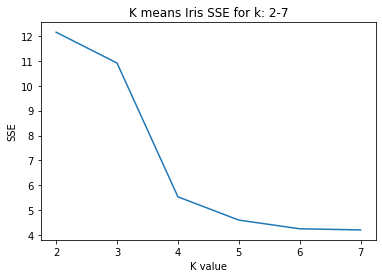

[12.143688281579719, 10.90827498962253, 5.541657763082496, 4.6088270241303295, 4.260285885448415, 4.214554633092767]


In [144]:
# Iris Classification without output label
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))

sse = []
k_vals = [2,3,4,5,6,7]
for k_val in k_vals:
  clf = KMEANSClustering(k=k_val, debug=False)

  # Train on evaluation data
  res = clf.fit(iris_norm)
  res.score()
  sse.append(res.get_total_sse())

plot_sse(k_vals, sse, "K means")

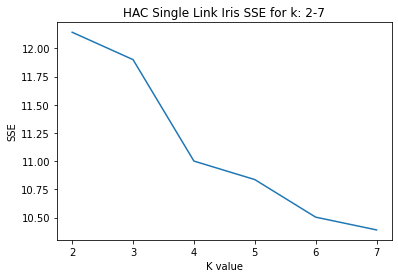

[12.143688281579719, 11.900755980943662, 11.000993601553954, 10.836893087506661, 10.50358461245487, 10.390325542075583]


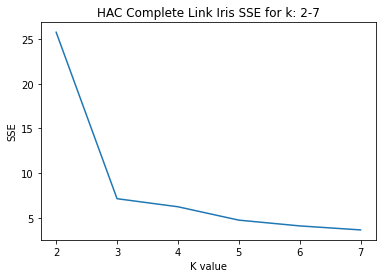

[25.74621835892373, 7.153670283877278, 6.251658260877483, 4.758612427918279, 4.114338438659382, 3.6657173105931418]


In [145]:
# Iris Classification with output label
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))

s_sse = []
c_sse = []
k_vals = [2,3,4,5,6,7]
for k_val in k_vals:
  # fit and score with single link
  s_clf = HACClustering(k=k_val, link_type='single')
  res = s_clf.fit(iris_norm)
  res.score()
  s_sse.append(res.get_total_sse())
  # fit and score with complete link
  c_clf = HACClustering(k=k_val, link_type='complete')
  res = c_clf.fit(iris_norm)
  res.score()
  c_sse.append(res.get_total_sse())

plot_sse(k_vals, s_sse, "HAC Single Link")
plot_sse(k_vals, c_sse, "HAC Complete Link")

Compare results and differences between using the output label and excluding the output label

## 2.2.2 (5%) Clustering the Iris Classification problem: K-Means

Requirements:
- Use the output label as an input feature
- Run K-Means 5 times with k=4, each time with different initial random centroids and discuss any variations in the results. 

In [149]:
#K-Means 5 times
!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))

sse = []
for i in range(6):
  clf = KMEANSClustering(k=4, debug=False)

  res = clf.fit(iris_norm)
  res.score()
  sse.append(res.get_total_sse())

print(sse)

[6.037206614805418, 6.176997209659224, 6.209222461782499, 5.532831003081899, 5.532831003081899, 6.209222461782499]


Discuss any variations in the results

## 3.1 (12.5%) Run the SK versions of HAC (both single and complete link) on iris including the output label and compare your results with those above.
Use the silhouette score for this iris problem(k = 2-7).  You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function from [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and compare the results. State which metric was used. 
- Possible sklean metrics include (* metrics require ground truth labels):
    - adjusted_mutual_info_score*
    - adjusted_rand_score*
    - homogeneity_score*
    - completeness_score*
    - fowlkes_mallows_score*
    - calinski_harabasz_score
    - davies_bouldin_score
- Experiment using different hyper-parameters. Discuss Results

In [150]:
# Load sklearn


!curl -s https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff --output iris.arff
iris_data = arff.loadarff('iris.arff')
iris_df = pd.DataFrame(iris_data[0])
iris_df = iris_df.iloc[: , :-1]
iris_norm =np.array(normalize_data(iris_df))

print('HAC COMPLETE LINK')
for i in range(2,8):
  clustering = AgglomerativeClustering(n_clusters=i, linkage='complete')
  clustering.fit_predict(iris_norm)
  print(silhouette_score(iris_norm, clustering.labels_, metric='euclidean'))
  
print('HAC SINGLE LINK')
for i in range(2,8):
  clustering = AgglomerativeClustering(n_clusters=i, linkage='single')
  clustering.fit_predict(iris_norm)
  print(silhouette_score(iris_norm, clustering.labels_, metric='euclidean'))

print('K MEANS')
for i in range(2,8):
  km = KMeans(n_clusters=i, random_state=42)
  km.fit_predict(iris_norm)
  print(silhouette_score(iris_norm, km.labels_, metric='euclidean'))
# for i in range(2,8):



HAC COMPLETE LINK
0.3039130905811038
0.5030674466509137
0.3931866272687035
0.3367877805272903
0.32918681244067777
0.32443653746679096
HAC SINGLE LINK
0.6294675561906643
0.530889323901593
0.38826644091020684
0.2051017399323444
0.16046278106948023
0.1093656643022919
K MEANS
0.6294675561906643
0.5043188549150883
0.44462733006506794
0.3519128932471106
0.3552385754421147
0.346315550277426


*Record impressions*

## 3.2 (12.5%) Run the SK version of k-means on iris including the output label and compare your results with those above. 

Use the silhouette score for this iris problem(k = 2-7). You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function form sklearn.metrics and compare the results. State which metric was used
- Experiment different hyper-parameters. Discuss Results

In [151]:
# Load sklearn 
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
print('HAC')
clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
clustering.fit_predict(X)
print(silhouette_score(X, clustering.labels_, metric='euclidean'))

print('K MEANS')
km = KMeans(n_clusters=2, n_init=10, max_iter=600, algorithm="auto", tol=1e-3)
km.fit_predict(X)
print(silhouette_score(X, km.labels_, metric='euclidean'))


HAC
0.7989868807602943
K MEANS
0.6972646156059464


*Record impressions*

## 4. (Optional 5% extra credit) For your silhouette experiment above, write and use your own code to calculate the silhouette scores, rather than the SK or other version. 


*Show findings here*

In [ ]:
# Copy function Below